In [1]:
#import numpy for linear algebra operations
import numpy as np
#import pandas library for data processing operations I/O in CSV file
import pandas as pd
#import matplotlib for visualizing the results
import matplotlib.pyplot as plt
import os

In [2]:
#with open('salary_data.csv', 'r') as file:
salary = pd.read_csv('salary_data.csv')    
print(salary)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [3]:
X = salary.iloc[:,0].values
X = np.reshape(X,newshape=(-1,1))
Y = salary.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)

In [5]:
print(X_train, "\n")
print(X_test, "\n")
print(Y_train, "\n")
print(Y_test, "\n")

[[ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] 

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]] 

[101302  56642  66029  64445  61111 113812  91738  46205 121872  60150
  39891  81363  93940  57189  54445 105582  43525  39343  98273  67938
  56957] 

[ 37731 122391  57081  63218 116969 109431 112635  55794  83088] 



In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [7]:
print('The linear soltion is y = mx+c where :')
print('m =', lin_reg.coef_[0])
print('c =', lin_reg.intercept_)


The linear soltion is y = mx+c where :
m = 9360.261286193656
c = 26777.391341197625


In [8]:
print('The predicted values for train data are:')
Y_train_pred = lin_reg.predict(X_train)
print(Y_train_pred,'\n')
Y_predicted = lin_reg.predict(X_test)
print('The predicted values for test data are:')
print(Y_predicted, '\n')
print('The actual values for test data are:')
print(Y_test)

The predicted values for train data are:
[100723.45550213  53922.14907116  74514.72390079  56730.22745702
  68898.56712907 103531.53388799  90427.16808731  38945.73101325
 125060.13484623  54858.17519978  47369.96617082  82002.93292974
  82938.95905836  61410.35810011  56730.22745702 111019.74291694
  45497.91391358  37073.67875601  93235.24647317  72642.67164355
  64218.43648597] 

The predicted values for test data are:
[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802] 

The actual values for test data are:
[ 37731 122391  57081  63218 116969 109431 112635  55794  83088]


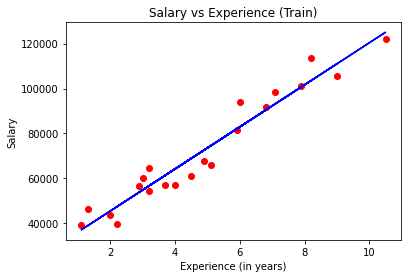

In [9]:
#Visualizing Training data vs prediction
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,Y_train_pred,'b-')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Train)')
plt.show()

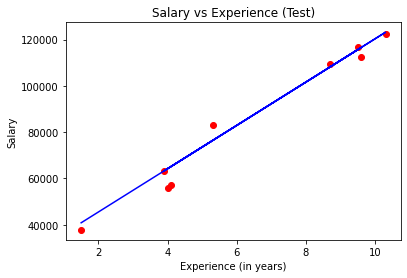

In [10]:
#Visualizing Training data vs prediction
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,Y_predicted,'b-')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Test)')
plt.show()

In [11]:
#Testing for Experience = 7.5 years
pred = lin_reg.predict([[7.5]])
print("Predicted Salary: ", round(pred[0]))

Predicted Salary:  96979


In [22]:
print("Linear regression model performance evaluation:")

from sklearn.metrics import mean_squared_error

model_rmse = mean_squared_error(
    y_true=Y_test[:], 
    y_pred=Y_predicted,
    squared=False
)
print(" - RMSE: ${}".format(round(model_rmse, 2)))

model_rse = np.sqrt(
    np.sum(
        (Y_test[:] - Y_predicted)**2
    ) / (len(Y_test[:])-(len(lin_reg.coef_) + 1))
)
print(" - RSE: ${}".format(round(model_rse, 2)))

Linear regression model performance evaluation:
 - RMSE: $4834.26
 - RSE: $5481.54
